In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://ivote.s3.us-east-2.amazonaws.com/epi+indicators-all+years.csv")

In [3]:
df

,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,prov_partic,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,AK,Alaska,2008,0,0,NaN,NaN,NaN,0.068102,0.062139,...,1.0,0.152142,NaN,0.052107,NaN,0,5.712700,0.003495,0.875693,0.682773
1,AK,Alaska,2010,1,1,0.0,1.0,0,0.082050,0.049773,...,1.0,NaN,0.093135,NaN,0.035279,0,NaN,NaN,0.835431,0.525560
2,AK,Alaska,2012,1,1,0.0,1.0,0,0.097063,0.060354,...,1.0,0.120155,NaN,0.063834,NaN,0,3.656872,0.003974,0.868472,0.591806
3,AK,Alaska,2014,1,1,0.0,1.0,0,0.086496,0.056739,...,1.0,NaN,0.093120,NaN,0.020184,0,4.156598,NaN,0.826949,0.543818
4,AL,Alabama,2008,0,0,NaN,NaN,NaN,0.000439,NaN,...,0.0,0.226150,NaN,0.075939,NaN,0,14.260800,NaN,0.852208,0.609528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,WV,West Virginia,2014,1,1,0.0,1.0,1,0.004942,0.006877,...,1.0,NaN,0.178077,NaN,0.034844,0,3.771747,NaN,0.756622,0.311667
200,WY,Wyoming,2008,1,0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.128153,NaN,0.059821,NaN,0,5.620379,0.005349,0.782883,0.631045
201,WY,Wyoming,2010,1,0,0.0,0.0,0,NaN,NaN,...,1.0,NaN,0.133298,NaN,0.020943,0,NaN,NaN,0.725026,0.458080
202,WY,Wyoming,2012,1,0,0.0,0.0,0,NaN,NaN,...,1.0,0.115326,NaN,0.041794,NaN,0,4.516539,0.006542,0.746732,0.592977


In [4]:
df2 = pd.read_csv("https://ivote.s3.us-east-2.amazonaws.com/epi+indicators-all+years+mod.csv")

In [5]:
df2

,Year-State,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,2008-AK,AK,Alaska,2008,0,0.0,NaN,NaN,NaN,0.068102,...,1.0,0.152142,NaN,0.052107,NaN,0.0,5.712700,0.003495,0.875693,0.682773
1,2010-AK,AK,Alaska,2010,1,1.0,0.0,1.0,0.0,0.082050,...,1.0,NaN,0.093135,NaN,0.035279,0.0,NaN,NaN,0.835431,0.525560
2,2012-AK,AK,Alaska,2012,1,1.0,0.0,1.0,0.0,0.097063,...,1.0,0.120155,NaN,0.063834,NaN,0.0,3.656872,0.003974,0.868472,0.591806
3,2014-AK,AK,Alaska,2014,1,1.0,0.0,1.0,0.0,0.086496,...,1.0,NaN,0.093120,NaN,0.020184,0.0,4.156598,NaN,0.826949,0.543818
4,2016-AK,AK,Alaska,2016,1,1.0,1.0,1.0,0.0,0.111646,...,1.0,0.121924,NaN,0.054229,NaN,1.0,6.428843,0.008295,0.875029,0.612886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2010-WY,WY,Wyoming,2010,1,0.0,0.0,0.0,0.0,NaN,...,1.0,NaN,0.133298,NaN,0.020943,0.0,NaN,NaN,0.725026,0.458080
302,2012-WY,WY,Wyoming,2012,1,0.0,0.0,0.0,0.0,NaN,...,1.0,0.115326,NaN,0.041794,NaN,0.0,4.516539,0.006542,0.746732,0.592977
303,2014-WY,WY,Wyoming,2014,1,0.0,0.0,0.0,0.0,NaN,...,1.0,NaN,0.113828,NaN,0.019362,0.0,2.759438,NaN,0.674434,0.393362
304,2016-WY,WY,Wyoming,2016,1,0.0,0.0,0.0,0.0,NaN,...,1.0,0.078365,NaN,0.033104,NaN,0.0,5.730819,0.011357,0.795159,0.597383


In [6]:
# Finding data type for all columns
df2.dtypes

Year-State                       object
state_abbv                       object
state_fips                       object
year                              int64
website_pollingplace              int64
website_reg_status              float64
website_precinct_ballot         float64
website_absentee_status         float64
website_provisional_status      float64
reg_rej                         float64
prov_partic                     float64
prov_rej_all                    float64
abs_rej_all_ballots             float64
abs_nonret                      float64
uocava_rej                      float64
uocava_nonret                   float64
eavs_completeness               float64
post_election_audit             float64
nonvoter_illness_onyear_pct     float64
nonvoter_illness_offyear_pct    float64
nonvoter_reg_onyear_pct         float64
nonvoter_reg_offyear_pct        float64
online_reg                      float64
wait                            float64
residual                        float64


In [7]:
df2.keys()

Index(['Year-State', 'state_abbv', 'state_fips', 'year',
       'website_pollingplace', 'website_reg_status', 'website_precinct_ballot',
       'website_absentee_status', 'website_provisional_status', 'reg_rej',
       'prov_partic', 'prov_rej_all', 'abs_rej_all_ballots', 'abs_nonret',
       'uocava_rej', 'uocava_nonret', 'eavs_completeness',
       'post_election_audit', 'nonvoter_illness_onyear_pct',
       'nonvoter_illness_offyear_pct', 'nonvoter_reg_onyear_pct',
       'nonvoter_reg_offyear_pct', 'online_reg', 'wait', 'residual',
       'pct_reg_of_vep_vrs', 'vep_turnout'],
      dtype='object')

In [9]:
df2.website_pollingplace.value_counts()

1    285
0     21
Name: website_pollingplace, dtype: int64

In [10]:
df2.website_reg_status.value_counts()

1.0    254
0.0     46
Name: website_reg_status, dtype: int64

In [11]:
df2.website_precinct_ballot.value_counts()

1.0    151
0.0    104
Name: website_precinct_ballot, dtype: int64

In [12]:
df2.website_absentee_status.value_counts()

1.0    178
0.0     75
0.5      1
Name: website_absentee_status, dtype: int64

In [13]:
df2.website_provisional_status.value_counts()

0.0    122
1.0    109
Name: website_provisional_status, dtype: int64

In [14]:
df2.reg_rej.value_counts()

0.000000    3
0.003418    1
0.099038    1
0.069668    1
0.000337    1
           ..
0.176766    1
0.011690    1
0.000722    1
0.010418    1
0.062990    1
Name: reg_rej, Length: 192, dtype: int64

In [15]:
df2.prov_partic.value_counts()

0.000000    5
0.000559    2
0.001938    1
0.002408    1
0.037651    1
           ..
0.000065    1
0.000046    1
0.001200    1
0.000979    1
0.006877    1
Name: prov_partic, Length: 257, dtype: int64

In [18]:
df2.prov_rej_all.value_counts()

0.000000    11
0.001535     1
0.001086     1
0.000884     1
0.001394     1
            ..
0.000015     1
0.009968     1
0.002116     1
0.000068     1
0.000657     1
Name: prov_rej_all, Length: 248, dtype: int64

In [17]:
df2.abs_rej_all_ballots.value_counts()

0.001100    2
0.000377    1
0.000422    1
0.000910    1
0.001666    1
           ..
0.000181    1
0.001958    1
0.002463    1
0.000559    1
0.000000    1
Name: abs_rej_all_ballots, Length: 281, dtype: int64

In [19]:
df2.abs_nonret.value_counts()

0.170423    2
0.124935    1
0.002625    1
0.067946    1
0.102271    1
           ..
0.008893    1
0.098428    1
0.025721    1
0.258362    1
0.079313    1
Name: abs_nonret, Length: 278, dtype: int64

In [20]:
df2.nonvoter_illness_onyear_pct.value_counts()

0.168346    1
0.099961    1
0.260052    1
0.150487    1
0.084571    1
           ..
0.202144    1
0.122078    1
0.130125    1
0.174487    1
0.166681    1
Name: nonvoter_illness_onyear_pct, Length: 153, dtype: int64

In [21]:
df2.nonvoter_illness_offyear_pct.value_counts()

0.100375    2
0.153780    1
0.164278    1
0.118220    1
0.156856    1
           ..
0.075033    1
0.134161    1
0.112320    1
0.120753    1
0.144121    1
Name: nonvoter_illness_offyear_pct, Length: 152, dtype: int64

In [22]:
df2_new = df2.replace(np.nan,0)
df2_new

,Year-State,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,2008-AK,AK,Alaska,2008,0,0.0,0.0,0.0,0.0,0.068102,...,1.0,0.152142,0.000000,0.052107,0.000000,0.0,5.712700,0.003495,0.875693,0.682773
1,2010-AK,AK,Alaska,2010,1,1.0,0.0,1.0,0.0,0.082050,...,1.0,0.000000,0.093135,0.000000,0.035279,0.0,0.000000,0.000000,0.835431,0.525560
2,2012-AK,AK,Alaska,2012,1,1.0,0.0,1.0,0.0,0.097063,...,1.0,0.120155,0.000000,0.063834,0.000000,0.0,3.656872,0.003974,0.868472,0.591806
3,2014-AK,AK,Alaska,2014,1,1.0,0.0,1.0,0.0,0.086496,...,1.0,0.000000,0.093120,0.000000,0.020184,0.0,4.156598,0.000000,0.826949,0.543818
4,2016-AK,AK,Alaska,2016,1,1.0,1.0,1.0,0.0,0.111646,...,1.0,0.121924,0.000000,0.054229,0.000000,1.0,6.428843,0.008295,0.875029,0.612886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2010-WY,WY,Wyoming,2010,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.000000,0.133298,0.000000,0.020943,0.0,0.000000,0.000000,0.725026,0.458080
302,2012-WY,WY,Wyoming,2012,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.115326,0.000000,0.041794,0.000000,0.0,4.516539,0.006542,0.746732,0.592977
303,2014-WY,WY,Wyoming,2014,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.000000,0.113828,0.000000,0.019362,0.0,2.759438,0.000000,0.674434,0.393362
304,2016-WY,WY,Wyoming,2016,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.078365,0.000000,0.033104,0.000000,0.0,5.730819,0.011357,0.795159,0.597383


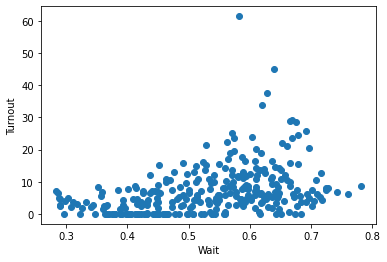

In [23]:
plt.scatter(df2_new.vep_turnout, df2_new.wait)
plt.xlabel('Wait')
plt.ylabel('Turnout')
plt.show()

In [24]:
y = df2_new.vep_turnout

In [25]:
X = df2_new.wait.values.reshape(-1, 1)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X, y)

LinearRegression()

In [28]:
y_pred = model.predict(X)
print(y_pred.shape)

(306,)


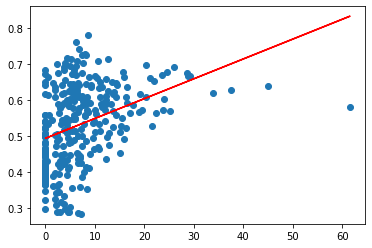

In [29]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [30]:
print(model.coef_)
print(model.intercept_)

[0.00552599]
0.4939498591491209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9788DE688>]],
      dtype=object)

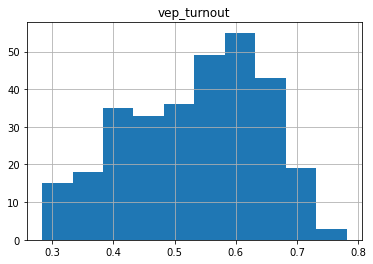

In [31]:
df2_new.hist(column='vep_turnout')

In [55]:
# Establish the bins for "vep_turnout" new column.
bins=[0,0.35,0.4,0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65,0.675,0.8]
df2_new['vep_turnout'].value_counts(bins=bins, sort=False)

(-0.001, 0.35]    18
(0.35, 0.4]       24
(0.4, 0.425]      17
(0.425, 0.45]     21
(0.45, 0.475]     18
(0.475, 0.5]      15
(0.5, 0.525]      19
(0.525, 0.55]     25
(0.55, 0.575]     24
(0.575, 0.6]      25
(0.6, 0.625]      27
(0.625, 0.65]     27
(0.65, 0.675]     19
(0.675, 0.8]      27
Name: vep_turnout, dtype: int64

In [56]:
# Establish the bin values 
bin_values = [0.35, 0.4, 0.425, 0.45, 0.475, 0.5, 0.525, 0.55, 0.575, 0.6, 0.625, 0.65, 0.675, 0.8]

In [58]:
# Categorize spending based on the bins and create a new column "vep_turnout_b"
df2_new["vep_turnout_b"] = pd.cut(df2_new['vep_turnout'], bins, labels=bin_values)
df2_new

,Year-State,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,...,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout,vep_turnout_b
0,2008-AK,AK,Alaska,2008,0,0.0,0.0,0.0,0.0,0.068102,...,0.152142,0.000000,0.052107,0.000000,0.0,5.712700,0.003495,0.875693,0.682773,0.800
1,2010-AK,AK,Alaska,2010,1,1.0,0.0,1.0,0.0,0.082050,...,0.000000,0.093135,0.000000,0.035279,0.0,0.000000,0.000000,0.835431,0.525560,0.550
2,2012-AK,AK,Alaska,2012,1,1.0,0.0,1.0,0.0,0.097063,...,0.120155,0.000000,0.063834,0.000000,0.0,3.656872,0.003974,0.868472,0.591806,0.600
3,2014-AK,AK,Alaska,2014,1,1.0,0.0,1.0,0.0,0.086496,...,0.000000,0.093120,0.000000,0.020184,0.0,4.156598,0.000000,0.826949,0.543818,0.550
4,2016-AK,AK,Alaska,2016,1,1.0,1.0,1.0,0.0,0.111646,...,0.121924,0.000000,0.054229,0.000000,1.0,6.428843,0.008295,0.875029,0.612886,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2010-WY,WY,Wyoming,2010,1,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.133298,0.000000,0.020943,0.0,0.000000,0.000000,0.725026,0.458080,0.475
302,2012-WY,WY,Wyoming,2012,1,0.0,0.0,0.0,0.0,0.000000,...,0.115326,0.000000,0.041794,0.000000,0.0,4.516539,0.006542,0.746732,0.592977,0.600
303,2014-WY,WY,Wyoming,2014,1,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.113828,0.000000,0.019362,0.0,2.759438,0.000000,0.674434,0.393362,0.400
304,2016-WY,WY,Wyoming,2016,1,0.0,0.0,0.0,0.0,0.000000,...,0.078365,0.000000,0.033104,0.000000,0.0,5.730819,0.011357,0.795159,0.597383,0.600


In [62]:
# New column vep_turnout_b has category data type (before conversion)
df2_new.vep_turnout_b.dtypes

dtype('float64')

In [61]:
# Changing data type for vep_turnout_b column
df2_new["vep_turnout_b"] = df2_new["vep_turnout_b"].astype(float)

In [63]:
# New column vep_turnout_b has float data type
df2_new.vep_turnout_b.dtypes

dtype('float64')

In [101]:
# Drop columns with Status, ASK_AMT, NAME, EIN
df3_new = df2_new.drop(['vep_turnout_b'], axis = 1)
df3_new

,Year-State,state_abbv,state_fips,year,website_pollingplace,website_reg_status,website_precinct_ballot,website_absentee_status,website_provisional_status,reg_rej,...,post_election_audit,nonvoter_illness_onyear_pct,nonvoter_illness_offyear_pct,nonvoter_reg_onyear_pct,nonvoter_reg_offyear_pct,online_reg,wait,residual,pct_reg_of_vep_vrs,vep_turnout
0,2008-AK,AK,Alaska,2008,0,0.0,0.0,0.0,0.0,0.068102,...,1.0,0.152142,0.000000,0.052107,0.000000,0.0,5.712700,0.003495,0.875693,0.682773
1,2010-AK,AK,Alaska,2010,1,1.0,0.0,1.0,0.0,0.082050,...,1.0,0.000000,0.093135,0.000000,0.035279,0.0,0.000000,0.000000,0.835431,0.525560
2,2012-AK,AK,Alaska,2012,1,1.0,0.0,1.0,0.0,0.097063,...,1.0,0.120155,0.000000,0.063834,0.000000,0.0,3.656872,0.003974,0.868472,0.591806
3,2014-AK,AK,Alaska,2014,1,1.0,0.0,1.0,0.0,0.086496,...,1.0,0.000000,0.093120,0.000000,0.020184,0.0,4.156598,0.000000,0.826949,0.543818
4,2016-AK,AK,Alaska,2016,1,1.0,1.0,1.0,0.0,0.111646,...,1.0,0.121924,0.000000,0.054229,0.000000,1.0,6.428843,0.008295,0.875029,0.612886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2010-WY,WY,Wyoming,2010,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.000000,0.133298,0.000000,0.020943,0.0,0.000000,0.000000,0.725026,0.458080
302,2012-WY,WY,Wyoming,2012,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.115326,0.000000,0.041794,0.000000,0.0,4.516539,0.006542,0.746732,0.592977
303,2014-WY,WY,Wyoming,2014,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.000000,0.113828,0.000000,0.019362,0.0,2.759438,0.000000,0.674434,0.393362
304,2016-WY,WY,Wyoming,2016,1,0.0,0.0,0.0,0.0,0.000000,...,1.0,0.078365,0.000000,0.033104,0.000000,0.0,5.730819,0.011357,0.795159,0.597383


## Random Forest Model

In [ ]:
# Implementation of Random Forest Classifier

In [102]:
# Dividing data into attributes and labels:
X = df3_new.iloc[:, 4:26].values
y = df3_new.iloc[:, 26].values

In [103]:
y

array([0.6827726, 0.5255604, 0.5918064, 0.5438179, 0.612886 , 0.5462276,
       0.6095284, 0.4306084, 0.5889097, 0.332124 , 0.5896026, 0.472894 ,
       0.5290489, 0.3754192, 0.5095499, 0.4014286, 0.5277001, 0.4138204,
       0.5736055, 0.4152188, 0.5329217, 0.3411599, 0.5501658, 0.4907542,
       0.6173517, 0.4505084, 0.5589381, 0.3078467, 0.5668691, 0.495903 ,
       0.716011 , 0.5069619, 0.7104929, 0.5446357, 0.7009678, 0.6295422,
       0.6664255, 0.459599 , 0.6099896, 0.4253355, 0.6421568, 0.5439393,
       0.6169486, 0.2957391, 0.6196569, 0.3579111, 0.6085837, 0.4374204,
       0.6583285, 0.4784293, 0.6266024, 0.3435541, 0.6440257, 0.5144278,
       0.6663098, 0.4228351, 0.6396278, 0.4326273, 0.6464386, 0.5494362,
       0.6273138, 0.4059247, 0.5865015, 0.3853082, 0.591585 , 0.5502736,
       0.4903561, 0.4009361, 0.444745 , 0.3649429, 0.4217789, 0.3930122,
       0.6965688, 0.5079022, 0.7024691, 0.502327 , 0.6837921, 0.5770594,
       0.6484317, 0.4277239, 0.6087676, 0.3960464, 

In [104]:
# Dividing the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [81]:
# Feature Scaling
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [116]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
rfr_model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [107]:
y_pred

array([0.65871779, 0.53980034, 0.56307635, 0.67323792, 0.42267283,
       0.56378024, 0.66832994, 0.56608075, 0.46985685, 0.47192838,
       0.40663921, 0.69629667, 0.43771338, 0.43334416, 0.62578696,
       0.56025265, 0.50808792, 0.52995301, 0.47261851, 0.39585894,
       0.57392139, 0.5829744 , 0.4192011 , 0.54158536, 0.56709237,
       0.56444895, 0.72145735, 0.52893546, 0.40180077, 0.39421952,
       0.41886113, 0.64325764, 0.70303089, 0.57852242, 0.5724321 ,
       0.40032712, 0.5693002 , 0.62442002, 0.52746759, 0.41474666,
       0.6530291 , 0.62951498, 0.54464225, 0.58362421, 0.6418239 ,
       0.45968826, 0.46111377, 0.43375142, 0.66286989, 0.55010273,
       0.42635626, 0.66561882, 0.64874259, 0.65429659, 0.5711866 ,
       0.64116611, 0.45158113, 0.65150587, 0.40988221, 0.48022633,
       0.4160543 , 0.38189789])

In [108]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.039765957580645175
Mean Squared Error: 0.002830084986544691
Root Mean Squared Error: 0.05319854308667382


In [109]:
# Calculate the absolute errors
errors= abs(y_pred - y_test)
errors

array([0.00238351, 0.04944424, 0.02202495, 0.00494058, 0.04995667,
       0.01361444, 0.02489304, 0.00644384, 0.05016545, 0.06670762,
       0.09497241, 0.02212243, 0.00696302, 0.08681636, 0.03529756,
       0.07525595, 0.04134828, 0.01591241, 0.11342969, 0.00556966,
       0.01498329, 0.0533418 , 0.0952282 , 0.01253646, 0.02013803,
       0.03859735, 0.00723165, 0.02967124, 0.01649257, 0.05634418,
       0.12877473, 0.05858234, 0.00056179, 0.09222908, 0.0191529 ,
       0.01212628, 0.0242304 , 0.00289378, 0.01152111, 0.00092626,
       0.0129488 , 0.04060528, 0.09300285, 0.04546799, 0.0022018 ,
       0.05182264, 0.10399953, 0.05300288, 0.03414531, 0.00387513,
       0.00352116, 0.00254788, 0.00460441, 0.04667121, 0.0302571 ,
       0.08547501, 0.11042123, 0.01444593, 0.02072619, 0.12231523,
       0.0200079 , 0.07959839])

In [110]:
# Calculate and display accuracy
mape= 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
accuracy

91.50273586899402

In [100]:
# Calculate and display accuracy - with "vep_turnout_b" target
mape= 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
accuracy

91.35403373392887

In [113]:
# Calculate feature importance in the Random Forest model.
importances = list(regressor.feature_importances_)
importances

[0.0005866583189944629,
 0.0031741742635690907,
 0.0030046199086440394,
 0.002872534084632406,
 0.0016862554641996097,
 0.010237099095882732,
 0.00924987886292916,
 0.015470854799320652,
 0.023526844404369772,
 0.01956922547303447,
 0.021537678361607894,
 0.02646899009300423,
 0.009114481950002239,
 0.002298532939107677,
 0.00681627250642111,
 0.23258993384741738,
 0.01797388729365678,
 0.3841216569569064,
 0.001900806376650727,
 0.02416788444301552,
 0.00742749799699281,
 0.17620423255964077]

In [118]:
X1 = df3_new.iloc[:, 4:26]

In [119]:
# We can sort the features by their importance.
sorted(zip(rfr_model.feature_importances_, X1.columns), reverse=True)

[(0.3841216569569064, 'nonvoter_reg_offyear_pct'),
 (0.23258993384741738, 'nonvoter_illness_offyear_pct'),
 (0.17620423255964077, 'pct_reg_of_vep_vrs'),
 (0.02646899009300423, 'uocava_nonret'),
 (0.02416788444301552, 'wait'),
 (0.023526844404369772, 'abs_rej_all_ballots'),
 (0.021537678361607894, 'uocava_rej'),
 (0.01956922547303447, 'abs_nonret'),
 (0.01797388729365678, 'nonvoter_reg_onyear_pct'),
 (0.015470854799320652, 'prov_rej_all'),
 (0.010237099095882732, 'reg_rej'),
 (0.00924987886292916, 'prov_partic'),
 (0.009114481950002239, 'eavs_completeness'),
 (0.00742749799699281, 'residual'),
 (0.00681627250642111, 'nonvoter_illness_onyear_pct'),
 (0.0031741742635690907, 'website_reg_status'),
 (0.0030046199086440394, 'website_precinct_ballot'),
 (0.002872534084632406, 'website_absentee_status'),
 (0.002298532939107677, 'post_election_audit'),
 (0.001900806376650727, 'online_reg'),
 (0.0016862554641996097, 'website_provisional_status'),
 (0.0005866583189944629, 'website_pollingplace')]

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)